In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
def get_image(image_path):
    """
    This function takes the address of the image as input and returns the pixesl values of the image
    """
    image = Image.open(image_path, "r").convert('RGB')
    image = image.resize((300 ,300))
    width, height = image.size
    pixel_values = list(image.getdata())
    if image.mode == "RGB":
        channels = 3
    elif image.mode == "L":
        channels = 1
    else:
        print("Unknown mode: %s" % image.mode)
        return None
    pixel_values = np.array(pixel_values).reshape((height, width, channels))
    return pixel_values

In [3]:
a = []
b = []
m = {"Bacteria":0, "Normal":1, "Fungi":2, "Nematodes":3, "Virus":4}
for dirname, _, filenames in os.walk('../input/leaf-disease/Datasets/'):
    for filename in filenames:
        s = str(os.path.join(dirname, filename))
        img = get_image(s)
        a.append(img)
        b.append(m[dirname.split('/')[-1]])
#         print(b[-1])
#         plt.imshow(img)
#         plt.show()
#         break

In [4]:
a = np.array(a, dtype='float32')
b = np.array(b)

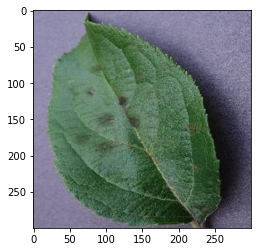

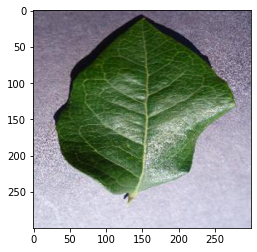

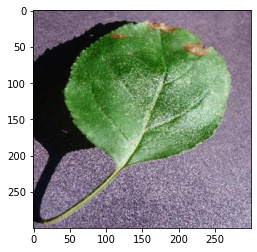

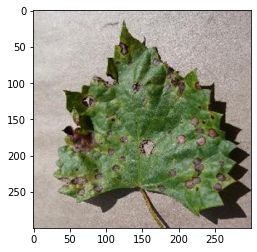

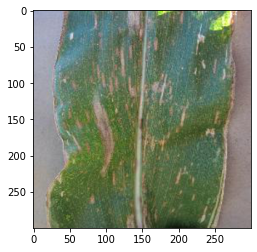

In [5]:
for dirname, _, filenames in os.walk('../input/leaf-disease/Datasets/'):
    for filename in filenames:
        s = str(os.path.join(dirname, filename))
        img = get_image(s)
        plt.imshow(img)
        plt.show()
        break

In [6]:
from sklearn.model_selection import train_test_split
import tensorflow.keras
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras import Sequential

In [ ]:
X = a / 225
y = b
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential()
model.add(Conv2D(256, 2, 2, input_shape=X[0].shape))
model.add(Conv2D(128, 2, 2))
# model.add(MaxPool2D((2,2)))
model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# model.summary()
history = model.fit(X_train, y_train, epochs=20, batch_size=5, validation_split=0.1)

Epoch 1/20
35/35 [==============================] - 84s 2s/step - loss: 1.7989 - accuracy: 0.1747 - val_loss: 3.9130 - val_accuracy: 0.1000
Epoch 2/20
35/35 [==============================] - 81s 2s/step - loss: 2.6416 - accuracy: 0.2243 - val_loss: 2.4845 - val_accuracy: 0.1000
Epoch 3/20
35/35 [==============================] - 82s 2s/step - loss: 2.2519 - accuracy: 0.1017 - val_loss: 3.8685 - val_accuracy: 0.1000
Epoch 4/20
35/35 [==============================] - 82s 2s/step - loss: 2.3115 - accuracy: 0.2396 - val_loss: 2.0630 - val_accuracy: 0.1500
Epoch 5/20
35/35 [==============================] - 82s 2s/step - loss: 2.0909 - accuracy: 0.2451 - val_loss: 2.2362 - val_accuracy: 0.1500
Epoch 6/20
35/35 [==============================] - 81s 2s/step - loss: 1.9990 - accuracy: 0.1058 - val_loss: 1.6509 - val_accuracy: 0.1500
Epoch 7/20
35/35 [==============================] - 82s 2s/step - loss: 1.6871 - accuracy: 0.2261 - val_loss: 1.6543 - val_accuracy: 0.1500
Epoch 8/20
 8/35 [==

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
model.evaluate(X_val, y_val)